<a href="https://colab.research.google.com/github/gihantha-sanjana/CMP7005-Assingment-Work-Repo/blob/main/Beijing%20Multi-Site%20Air%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Direct to the DataSet Folder Path.

In [29]:
%cd /content/drive/My Drive/ColabNotebooks/DatasetCMP7005

/content/drive/My Drive/ColabNotebooks/DatasetCMP7005


In [30]:
import pandas as pd


Display All CSV files in my Google Drive Folder

In [31]:
import glob
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv']

In [32]:
df_list = [pd.read_csv(file) for file in csv_files]

In [33]:
df_merged = pd.concat(df_list, axis=0, ignore_index=True)

Merge the DataSet files into One.

In [34]:
df_merged

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
210380,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
210381,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
210382,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


Save the Merge CSV File into one CSV file.

In [35]:
df_merged.to_csv('/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Merge-Beijing-Multi-Site-Air-Quality.CSV', index=False)

Load the Merge DataSet file from Google Colab Directry.

In [36]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Merge-Beijing-Multi-Site-Air-Quality.CSV')

In [37]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Rename the Dataset Column Names

In [38]:
df.rename(columns={'No': 'NO', 'year': 'YEAR', 'month': 'MONTH', 'day':'DAY','hour':'HOUR','wd':'WD','station':'STATION'}, inplace=True)

In [39]:
df.head()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Drop the No Column becuase it is not Important.

In [40]:
df.drop('NO', axis=1, inplace=True)

In [41]:
df.head()

,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Combined the Year, Month, Day and Hour Columns as a One Column in Dataset becuase we can do EDA easily by doing this.

In [42]:
def consolidate_datetime(df):

    df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

    return df.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'])

df = consolidate_datetime(df)


Save the Combined Columns file as a New CSV file into Google Drive.

In [43]:
date_time_combination = '/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/TimeDateCombine-Beijing-Multi-Site-Air-Quality.CSV'
df.to_csv(date_time_combination, index=False)

In [44]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,DATETIME
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


Check the DataSet Rows

In [45]:
df.shape[0]

210384

Check the DataSet Columns

In [46]:
df.shape[1]

14

Checking the Types of Data

In [47]:
df.dtypes

,0
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64
PRES,float64
DEWP,float64
RAIN,float64


Checking the Missing Values in DataSet

In [48]:
df.isna().sum()

,0
PM2.5,4450
PM10,3374
SO2,4459
NO2,5481
CO,10123
O3,5414
TEMP,152
PRES,149
DEWP,152
RAIN,150


Checking the Precentage of Missing Values in DataSet

In [49]:
df.isna().sum()/len(df)*100

,0
PM2.5,2.115180
PM10,1.603734
SO2,2.119458
NO2,2.605236
CO,4.811678
O3,2.573390
TEMP,0.072249
PRES,0.070823
DEWP,0.072249
RAIN,0.071298


check the Missing Values DataType

In [50]:
df.isna().sum().dtypes

dtype('int64')

Checking the Missing Values in my Dataset using HeatMap in here Every yellow line indicates true it meaning where we have null values.

<Axes: >

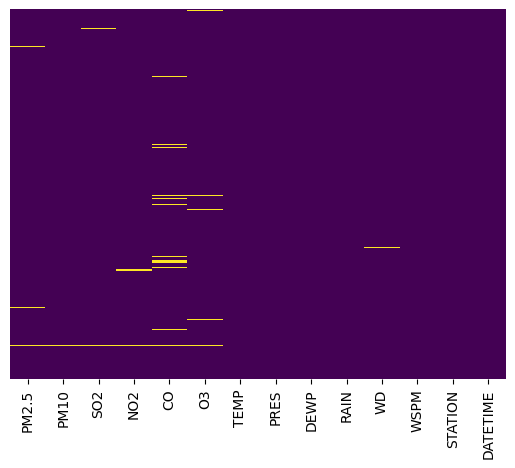

In [51]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Clean the Data Set Columns using Median Value of below fileds.

In [54]:
columns_to_fill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].median())


Check the Null Values Summary in Data Set

In [55]:
df.isna().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


Wind Direction Column fill with Previous Valid Value

In [56]:
df['WD'] = df['WD'].ffill()

In [57]:
df.isna().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


Now check the Dataset still have Null values.

<Axes: >

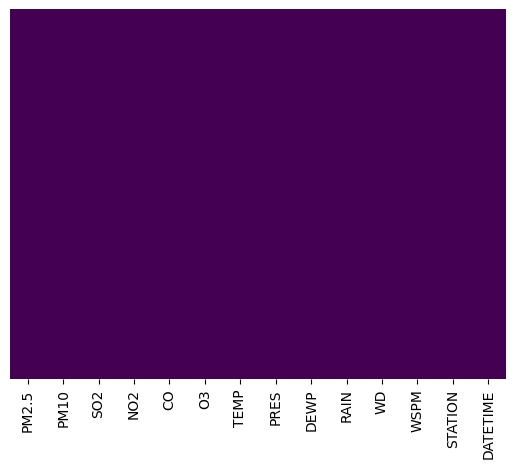

In [58]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Save the Clean Dataset to the Google Drive.

In [59]:
complete_datset_without_null = '/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Clean-Beijing-Multi-Site-Air-Quality.CSV'
df.to_csv(complete_datset_without_null, index=False)

In [60]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Clean-Beijing-Multi-Site-Air-Quality.CSV')

In [61]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000
mean,81.489809,106.737232,16.664010,53.805374,1270.839850,56.713851,13.678943,1011.460412,2.446983,0.063983,1.814827
std,81.869064,92.872727,22.422486,34.123749,1169.291909,56.789434,11.416790,10.469232,13.778037,0.804385,1.262114
min,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,22.000000,38.000000,3.000000,28.000000,500.000000,10.000000,3.200000,1002.900000,-8.900000,0.000000,1.000000
50%,57.000000,84.000000,8.000000,47.000000,900.000000,44.000000,14.600000,1011.000000,3.000000,0.000000,1.500000
75%,112.000000,146.000000,20.000000,73.000000,1500.000000,80.000000,23.400000,1019.900000,15.000000,0.000000,2.300000
max,999.000000,999.000000,411.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,13.200000
